In [1]:
import pandas as pd

'''
old : topic allocation results in 2020-11-16
new : oil info in 2023
raw : raw news in 2023, including that not related to oil
lengths are mismatched since July 2007
'''

# 200801
old = pd.read_csv('old.csv')
new = pd.read_csv('new.csv')
raw = pd.read_csv('new_raw.csv')
assert len(old) != len(new)

# 200701
old07 = pd.read_csv('old07.csv')
new07 = pd.read_csv('new07.csv')
raw07 = pd.read_csv('new07_raw.csv')
assert len(old07) == len(new07)

# energy tag list
tag = pd.read_csv('energytag.csv')['energytag'].values
tag = ['N2:'+i for i in tag]

In [2]:
def get_diff_tags(old, new):
    diffHeadlines = set(old['headline']).difference(new['headline'])
    if diffHeadlines != set():
        diffIdx = raw[raw['headline'].isin(diffHeadlines)].index
        diffSubjects = raw['subject'].iloc[diffIdx]
        tagLists = [list(set(eval(diffSubject)).difference(tag)) for diffSubject in diffSubjects]
        return [item for sublist in tagLists for item in sublist if item.startswith('N2:')]
        
    else:
        print('Matching headlines')

In [3]:
# 200801
from collections import Counter
diffTags = get_diff_tags(old, new)
Counter(diffTags).most_common(15)

[('N2:LEN', 473),
 ('N2:RTRS', 471),
 ('N2:RET', 442),
 ('N2:RFOD', 432),
 ('N2:NCYC', 431),
 ('N2:FDRT', 422),
 ('N2:EUROPE', 378),
 ('N2:WEU', 325),
 ('N2:CYCS', 266),
 ('N2:SHOP', 210),
 ('N2:GB', 174),
 ('N2:FR', 151),
 ('N2:ASIA', 150),
 ('N2:FINS', 145),
 ('N2:DEPT', 142)]

In [4]:
# 200701
get_diff_tags(old07, new07)

Matching headlines


In [14]:
df = pd.read_csv('meanTopic.csv')
df.set_index('Unnamed: 0', inplace=True)
df

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
Unnamed: 0,,,,,,,
199601,0.055481,0.463931,0.006580,0.278519,0.018475,0.020140,0.028515
199602,0.043358,0.449320,0.010450,0.260126,0.021898,0.019990,0.031349
199603,0.055754,0.437086,0.005410,0.248228,0.019173,0.034771,0.028809
199604,0.062748,0.456380,0.005169,0.253286,0.012405,0.030125,0.022621
199605,0.064205,0.484560,0.009099,0.244806,0.015935,0.034849,0.029561
...,...,...,...,...,...,...,...
202210,0.059923,0.164458,0.033050,0.490684,0.051444,0.007318,0.031917
202211,0.057836,0.160821,0.051484,0.484127,0.051687,0.007425,0.029745
202212,0.064998,0.178359,0.038296,0.541756,0.056285,0.007766,0.027191


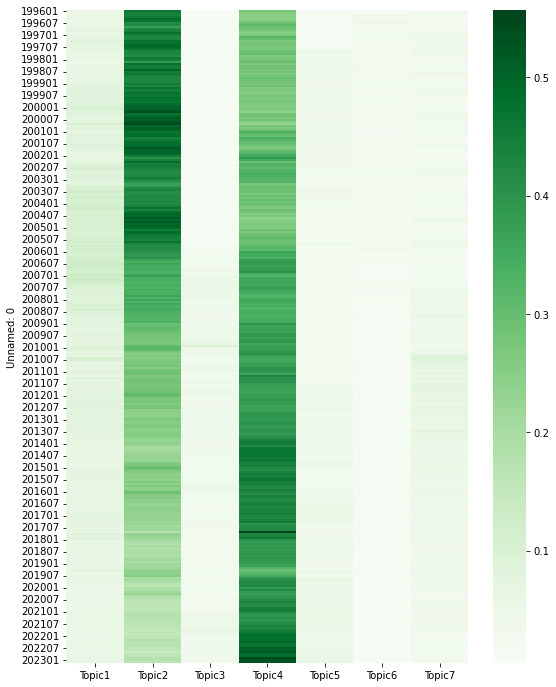

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,12))
sns.heatmap(df, cmap='Greens', ax=ax);

In [21]:
words = pd.read_csv('clustering_C.csv')

In [25]:
# Topic 2
words[words['Topic']==2]['word'].values

array(['oil', 'barrel', 'brent', 'crude.oil', 'refin', 'opec', 'heat',
       'petroleum', 'diesel', 'barg', 'ipe', 'distil', 'sulphur',
       'gallon', 'tanker', 'eia', 'nwe', 'ara', 'energi.inform.administr',
       'bunker', 'api', 'usg', 'padd', 'cartel', 'unlead', 'crack.spread',
       'light.crude', 'middl.distil', 'crude.import',
       'american.petroleum.institut', 'sweet.crude', 'iea',
       'intern.energi.agenc', 'embargo', 'depart.energi', 'straight.run',
       'spr', 'doe', 'intern.petroleum.exchang', 'reformul.gasolin',
       'strateg.petroleum.reserv', 'viscos', 'spare.capac',
       'amsterdam.rotterdam.antwerp', 'aframax', 'petroleo.de.venezuela',
       'float.storag', 'product.quota', 'util.rate', 'paraffin',
       'residu.fuel.oil', 'hormuz', 'light.end', 'arabian.light',
       'charter.rate', 'worldscal', 'persian.gulf', 'arab.oil.embargo',
       'high.densiti', 'petrodollar', 'equilibrium', 'centistok',
       'water.treatment', 'gross.refin.margin', 'ball

In [27]:
# Topic 4
words[words['Topic']==4]['word'].values

array(['gas', 'energi', 'coal', 'nuclear', 'electr', 'outag', 'generat',
       'equiti', 'mine', 'lead', 'lng', 'addit', 'reactor', 'renew',
       'solar', 'case', 'miner', 'grid', 'hydro', 'power.generat',
       'henri.hub', 'farm', 'enron', 'conserv', 'core',
       'liquefi.natur.gas', 'ocean', 'resid', 'uranium', 'turbin',
       'therm', 'steam', 'transco', 'coke', 'ferc', 'balanc.volum',
       'atmospher', 'meter', 'abandon', 'blow', 'degre.day', 'transform',
       'interrupt', 'lignit', 'combin.cycl', 'zeebrugg', 'smelter',
       'heat.degre.day', 'geotherm', 'peak.demand', 'enrich.uranium',
       'anglo.american', 'radioact', 'cool.degre.day', 'compress',
       'ofgem', 'cng', 'liquefact', 'utilis.rate', 'plutonium',
       'independ.power.produc', 'american.gas.associ', 'municip.util',
       'cogener', 'psc', 'anthracit', 'tennesse.valley.author',
       'calorif.valu', 'coolant', 'compress.natur.gas', 'fusion',
       'liquid.natur.gas', 'peak.load', 'flue', 'base.lo